In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample DataFrame with more features
df = pd.DataFrame({
    'feature1': [10, 12, 14, 15, 18, 19, 21, 22, 23, 24, 50, 51, 52, 53, 54, 55, 56,100,101,102,103],
    'feature2': [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 30, 31, 32, 33, 34, 35, 36, 50,51,52,53]
})

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['feature1'].quantile(0.25)
Q3 = df['feature1'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fit KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['feature1', 'feature2']])

# Impute outliers based on cluster centers
for index, row in df.iterrows():
    if row['feature1'] < lower_bound or row['feature1'] > upper_bound:
        cluster_center = kmeans.cluster_centers_[row['cluster']]
        df.at[index, 'feature1'] = cluster_center[0]

# print(df)

# Plotting the clusters
plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame with missing values
df = pd.DataFrame({
    'Category': ['A', 'B', np.nan, 'A', 'B', 'B', np.nan, 'A','B', 'B','B']
})
print(df)

# Calculate the mode of the 'Category' column
mode_value = df['Category'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['Category'].fillna(mode_value, inplace=True)

print(df)

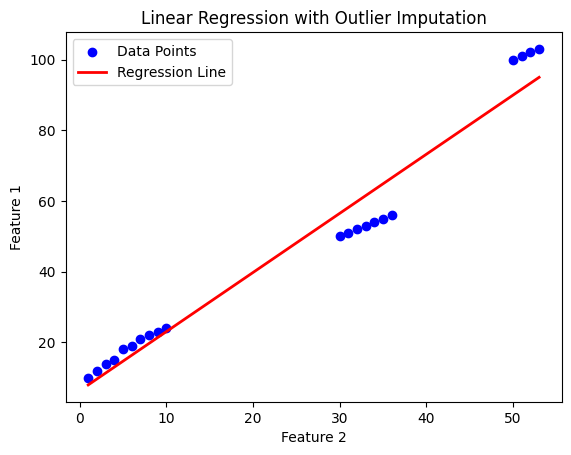

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample DataFrame with more features
df = pd.DataFrame({
    'feature1': [10, 12, 14, 15, 18, 19, 21, 22, 23, 24, 50, 51, 52, 53, 54, 55, 56,100,101,102,103],
    'feature2': [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 30, 31, 32, 33, 34, 35, 36, 50,51,52,53]
})

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['feature1'].quantile(0.25)
Q3 = df['feature1'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fit linear regression
X = df[['feature2']]
y = df['feature1']
model = LinearRegression().fit(X, y)

# Predict and impute outliers
for index, row in df.iterrows():
    if row['feature1'] < lower_bound or row['feature1'] > upper_bound:
        predicted_value = model.predict([[row['feature2']]])
        df.at[index, 'feature1'] = predicted_value

# Plotting the original data points
plt.scatter(df['feature2'], df['feature1'], color='blue', label='Data Points')

# Plotting the regression line
plt.plot(df['feature2'], model.predict(X), color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Feature 2')
plt.ylabel('Feature 1')
plt.title('Linear Regression with Outlier Imputation')
plt.legend()
plt.show()
